# Finance Data Project 

In this data project I will focus on exploratory data analysis of stock prices and further visualisation. 

This project focuses on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [195]:
from pandas_datareader import data,wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import pandas_datareader as pdr

## Data

stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [196]:
#setting timeframe for tickers
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [197]:
#setting tickers to and timeframe
BAC = data.DataReader("BAC", 'yahoo', start, end)
GS=data.DataReader("GS", 'yahoo', start, end)
C=data.DataReader("C", 'yahoo', start, end)
JPM = data.DataReader("JPM", 'yahoo', start, end)
MS=data.DataReader("MS", 'yahoo', start, end)
WFC=data.DataReader("WFC", 'yahoo', start, end)

In [198]:
#list of the ticker symbols (as strings) in alphabetical order. 
tickers = ['BAC', 'GS', 'JPM', 'C', 'MS', "WFC"]

In [199]:
# pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. 
# keys argument equal to the tickers list
#axis =0
bank_stocks= pd.concat([BAC, GS, JPM, C, MS, WFC],keys=tickers,axis =1)

In [200]:
#column name levels
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [201]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                     GS                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.364243  129.440002  124.230003  126.699997  128.869995  ...   
2006-01-04   33.009907  128.910004  126.379997  127.349998  127.089996  ...   
2006-01-05   33.052422  127.320000  125.610001  126.000000  127.040001  ...   
2006-01-06   33.002823  129.250000  127.290001  127.290001  128.839996  ...   
2006-01-09   33.024082  130.619995  128.000000  128.500000  130.389999  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.224964  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.249119  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.345787  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.382038  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.756565  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.104458  
2006-01-04   31.799999  31.530001  10870000.0  19.871265  
2006-01-05   31.500000  31.495001  10158000.0  19.849215  
2006-01-06   31.580000  31.680000   8403800.0  19.965811  
2006-01-09   31.674999  31.674999   5619600.0  19.962656  

[5 rows x 36 columns]

# EDA

In [202]:
#max 'Close' price for each bank's stock throughout the time period
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
GS     247.919998
JPM     70.080002
C      564.099976
MS      89.300003
WFC     58.520000
dtype: float64

#returns are typically defined by

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [203]:
#new data frame "returns"
returns=pd.DataFrame()

In [303]:
#Using pandas pct_change() method on the Close column I created a column representing this return value
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,GS Return,JPM Return,C Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.013812,-0.014183,-0.018462,0.000686,-0.011599
2006-01-05,0.001288,-0.000393,0.003029,0.004961,0.002742,-0.001110
2006-01-06,-0.001501,0.014169,0.007046,0.000000,0.001025,0.005874
2006-01-09,0.000644,0.012030,0.016242,-0.004731,0.010586,-0.000158


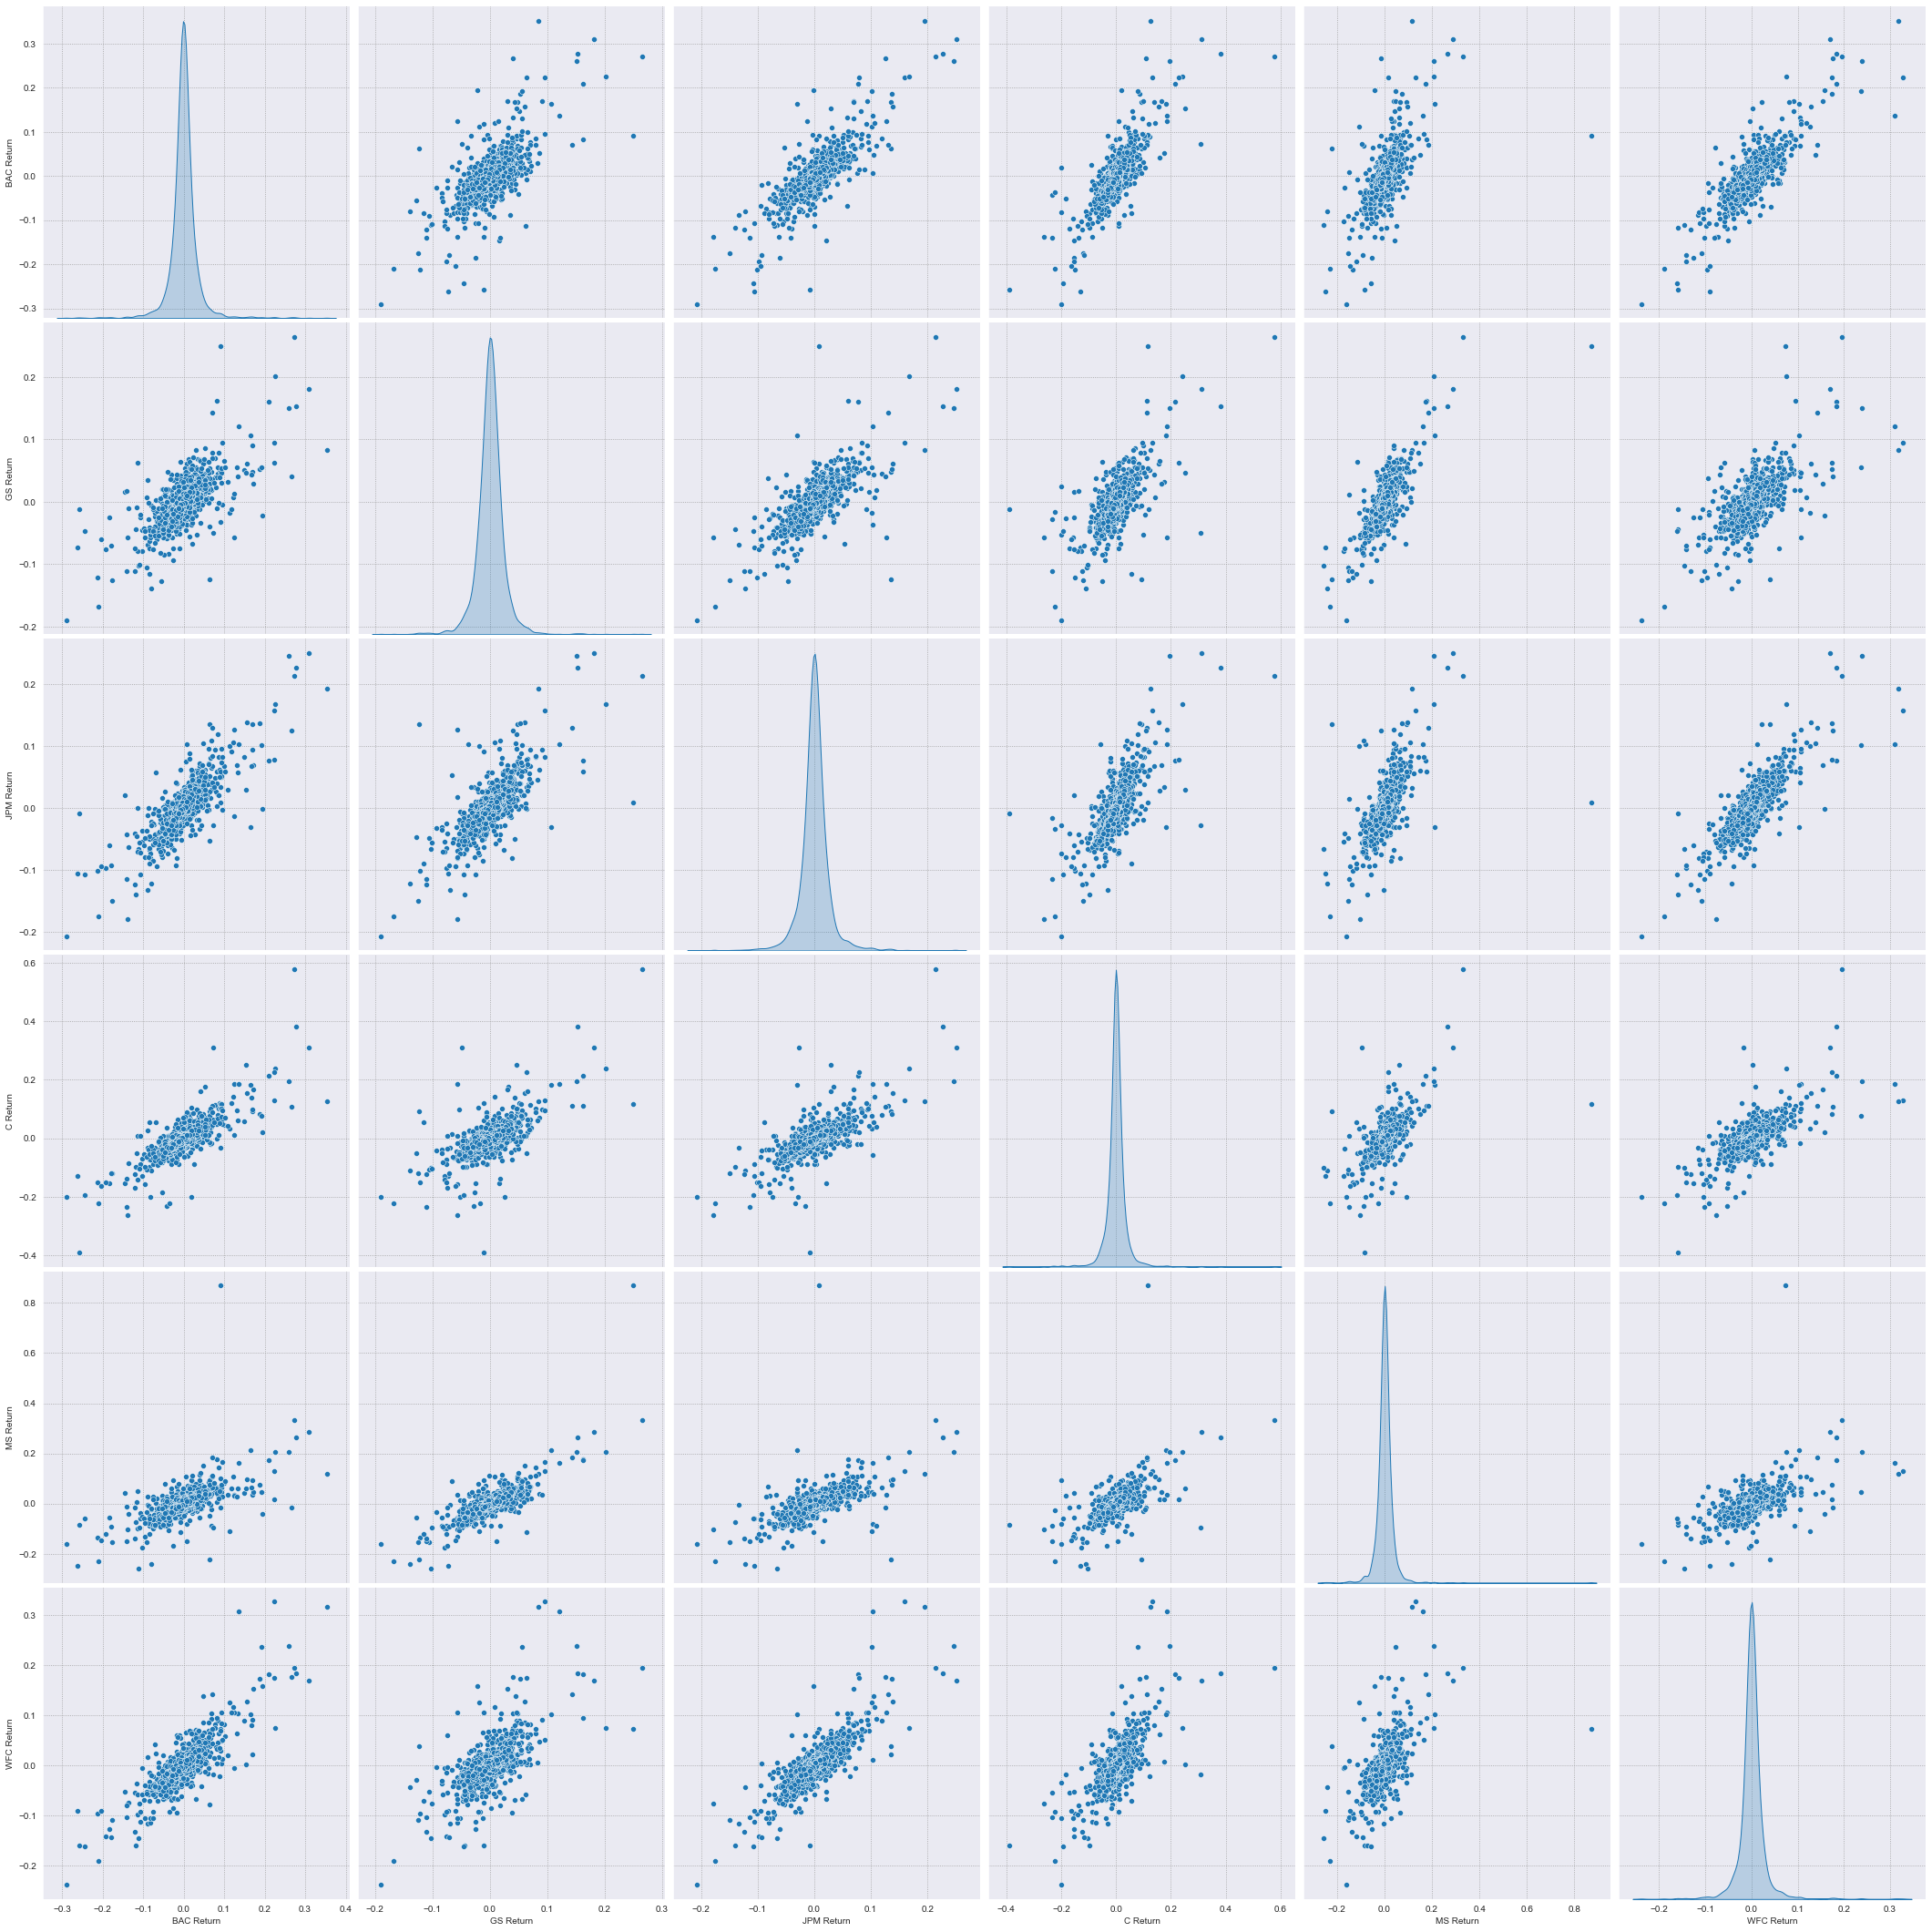

In [302]:
# Pairplot of returns. CitiGroup stands out
# https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008

import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.pairplot(returns[1:],diag_kind='kde',height=5, aspect=1,palette='green')

https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29

### Best and worst single day returns

In [206]:
returns.idxmin() # Worst Drop (4 of them on Inauguration day)

BAC Return   2009-01-20
GS Return    2009-01-20
JPM Return   2009-01-20
C Return     2009-02-27
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [208]:
returns.idxmax()# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.

BAC Return   2009-04-09
GS Return    2008-11-24
JPM Return   2009-01-21
C Return     2008-11-24
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [209]:
# standard deviation of the returns - classification of the riskiest stock over the entire time period 
returns.std() #GS returns riskiest 

BAC Return    0.036647
GS Return     0.025390
JPM Return    0.027667
C Return      0.038672
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [278]:
# standard deviation of the returns - classification of the riskiest stock over 2015
returns['2015-01-01':'2015-12-31'].std()  # Very similar risk profiles, WFC,JPM & GS

BAC Return    0.016163
GS Return     0.014046
JPM Return    0.014017
C Return      0.015289
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\srolc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='MS Return', ylabel='Density'>

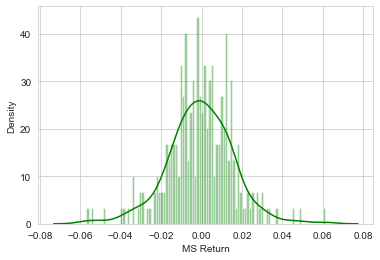

In [211]:
sns.distplot(returns['2015-01-01':'2015-12-31']['MS Return'], color='green',bins=100 )

<AxesSubplot:xlabel='C Return', ylabel='Density'>

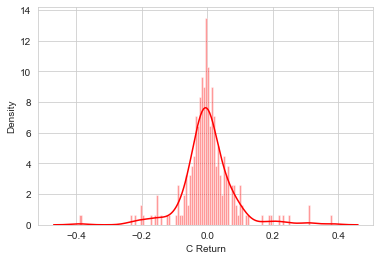

In [274]:
#visualisation of returns for CitiGroup 2009
sns.distplot(returns['2009-01-01':'2009-12-31']['C Return'], color='red',bins=125 )

C:\Users\srolc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='BAC Return', ylabel='Density'>

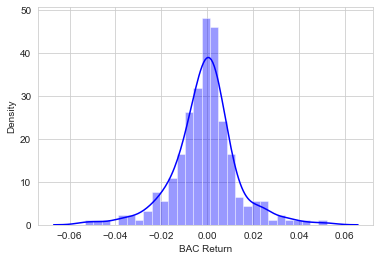

In [276]:
#visualisation of returns for Bank of America 2007
sns.distplot(returns['2007-01-01': '2008-01-01']['BAC Return'], color='blue')

# Visualisations

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

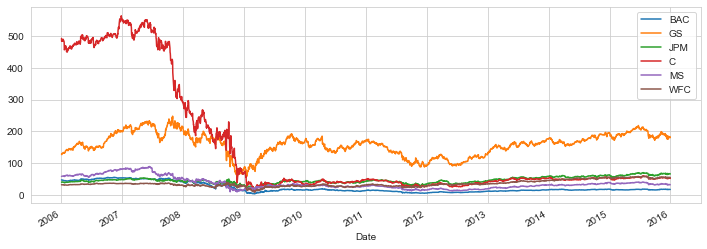

In [221]:
# lineplot showing Close price for each bank for the entire index of time
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<AxesSubplot:xlabel='Date'>

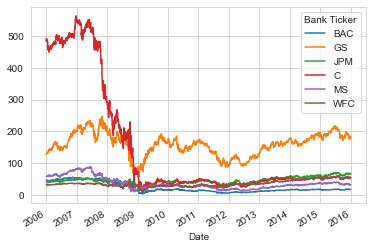

In [226]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

## Moving Averages


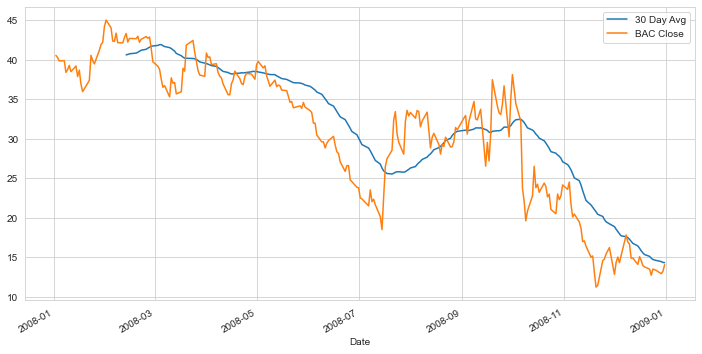

In [236]:
plt.figure(figsize=(12,6))
#plotting the 30 day average against Close Price of BAC 2008
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

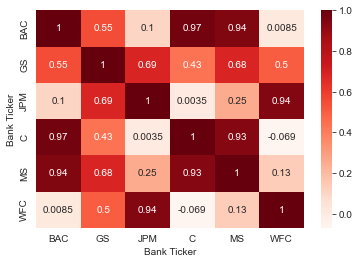

In [248]:
#heatmap visualizing correlation between close prices of stocks
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True, cmap='Reds') 

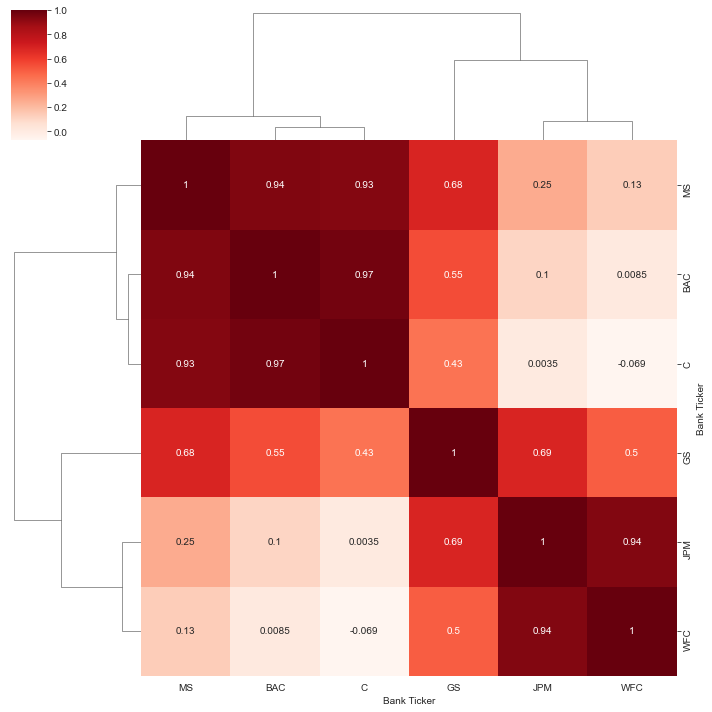

In [250]:
#clustermap visualizing close correlation between close prices of stocks
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True, cmap='Reds') 

##### In this part of the project I will rely on the cufflinks library to create some Technical Analysis plots. 

In [257]:
#Bank of America stock Jan 1st 2015 -Jan 1st 2016
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [260]:
#CitiGroup stock Jan 1st 2013 -Jan 1st 2016
C[['Open', 'High', 'Low', 'Close']].loc['2013-01-01':'2016-01-01'].iplot(kind='candle')

In [271]:
# Simple moving averages for 2015 in period 13,21 & 55 for Morgan Stanley
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55]
                                                   ,title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [272]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')